[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train a YOLOv8 Oriented Bounding Boxes Model

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/yolov8-keypoint-detection-custom-train)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

In this guide, we will walk through how to train a YOLOv8 oriented bounding box detection model.

If you notice that our notebook behaves incorrectly, let us know by [opening an issue on the Roboflow Notebooks repository](https://github.com/roboflow/notebooks/issues).

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading our [YOLOv8 oriented bounding box training blog post](https://blog.roboflow.com/train-yolov8-obb-model/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Checking that our Colab environment has a GPU
- Installing YOLOv8
- Preparing a dataset
- Training a YOLOv8 OBB model
- Running inference on our model

Without further ado, let's get started!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [3]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe

Need data for your project? Check out Roboflow Universe, a repository of open source computer vision datasets. You can export any dataset labeled for instance segmentation as a YOLOv8 Oriented Bounding Boxes dataset for use in training a YOLOv8 Oriented Bounding Boxes model.

[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Prepare a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let us show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Choose "Object Detection" as your project type.

<img src="https://media.roboflow.com/obb-tutorial/create.png" alt="Object detection selected on the Roboflow Create Project pop up" height="300" />

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<img src="https://media.roboflow.com/obb-tutorial/upload.png" alt="Uploading images to Roboflow" height="300" />

### Step 3: Label Data

If you only have images, you can label them with oriented bounding boxes in [Roboflow Annotate](https://docs.roboflow.com/annotate).

**To label an oriented bounding box, use our polygon annotation tool.**

You can also take an existing segmentation dataset from your workspace or Roboflow Universe and export it as OBB.

<img src="https://media.roboflow.com/obb-tutorial/annotate.png" alt="Annotate an image" height="300" />

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<img src="https://media.roboflow.com/keypoint/version.png" alt="Generate a dataset version" height="300" />

### Step 5: Export dataset

Once the dataset version is generated, we can download it for use in training a model.

![Generate a dataset version](https://media.roboflow.com/keypoint/export.png)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("vaictraining").project("vex-robots")
dataset = project.version(1).download("yolov8-obb")

import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vex-Robots-1 in yolov8-obb:: 100%|██████████| 284/284 [00:00<00:00, 3527.99it/s]


## Train a YOLOv8 OBB Object Detection Model

With our dataset downloaded, we can now train a YOLOv8 OBB object detection model. Run the code snippet below to start training your model:

In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

100%|██████████| 6.26M/6.26M [00:00<00:00, 83.6MB/s]


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/datasets/Vex-Robots-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=15 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/Vex-Robots-1/train/labels... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<00:00, 206.91it/s]

train: New cache created: /content/datasets/Vex-Robots-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/Vex-Robots-1/valid/labels... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 2679.26it/s]

val: New cache created: /content/datasets/Vex-Robots-1/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/obb/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      2.348      2.662      3.748         65        640: 100%|██████████| 7/7 [01:42<00:00, 14.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]

                   all         17         17      0.125      0.529      0.159     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G       1.86      2.322      3.259         50        640: 100%|██████████| 7/7 [01:32<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.18s/it]

                   all         17         17      0.323      0.673      0.506      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.636      1.907      3.057         53        640: 100%|██████████| 7/7 [01:33<00:00, 13.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.59s/it]

                   all         17         17      0.605      0.824      0.721      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.382      1.602      2.863         55        640: 100%|██████████| 7/7 [01:33<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]

                   all         17         17      0.843      0.824      0.898      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G       1.43      1.513      2.748         40        640: 100%|██████████| 7/7 [01:35<00:00, 13.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]

                   all         17         17      0.979      0.824      0.962       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.355      1.326      2.827         49        640: 100%|██████████| 7/7 [01:35<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.78s/it]

                   all         17         17      0.612      0.824      0.807      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.268      1.208      2.821         43        640: 100%|██████████| 7/7 [01:34<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]

                   all         17         17      0.882      0.879      0.877      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G       1.34      1.182      2.762         60        640: 100%|██████████| 7/7 [01:33<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.14s/it]

                   all         17         17       0.72      0.824      0.798      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.233      1.065      2.653         54        640: 100%|██████████| 7/7 [01:40<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]

                   all         17         17      0.828      0.941      0.917      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.132     0.9647      2.546         60        640: 100%|██████████| 7/7 [01:33<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

                   all         17         17      0.885      0.941      0.928      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.201      1.019      2.687         46        640: 100%|██████████| 7/7 [01:34<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.51s/it]

                   all         17         17      0.943      0.977      0.986      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.174     0.9686      2.687         49        640: 100%|██████████| 7/7 [01:37<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]

                   all         17         17      0.889      0.882      0.954      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.222     0.9596      2.667         62        640: 100%|██████████| 7/7 [01:34<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]

                   all         17         17      0.906      0.824      0.959      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.225     0.9682      2.681         53        640: 100%|██████████| 7/7 [01:33<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

                   all         17         17      0.944      0.995      0.992      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.147     0.9158      2.718         60        640: 100%|██████████| 7/7 [01:36<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

                   all         17         17      0.991          1      0.995      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.116     0.9233      2.677         60        640: 100%|██████████| 7/7 [01:37<00:00, 13.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]

                   all         17         17      0.769          1      0.897      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G       1.24     0.9413      2.722         58        640: 100%|██████████| 7/7 [01:34<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]

                   all         17         17      0.892          1       0.93      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G       1.27     0.9496      2.688         53        640: 100%|██████████| 7/7 [01:35<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]

                   all         17         17      0.721       0.76      0.821      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G       1.21     0.9087      2.698         52        640:  57%|█████▋    | 4/7 [00:59<00:44, 14.88s/it]


KeyboardInterrupt: 

Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the OBB Object Detection Model

Let's test our OBB detection model on an image:

In [9]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/Vex-Robots-1/test/images/90_jpg.rf.47ad78c2e28f724a1caa599aa0383ad6.jpg: 640x640 411.5ms
Speed: 3.5ms preprocess, 411.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'VEX'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[130, 143, 151],
        [124, 137, 145],
        [117, 130, 138],
        ...,
        [ 63,  79,  86],
        [ 63,  79,  86],
        [ 63,  79,  86]],

       [[120, 133, 141],
        [117, 130, 138],
        [114, 127, 135],
        ...,
        [ 63,  79,  86],
        [ 63,  79,  86],
        [ 63,  79,  86]],

       [[114, 127, 135],
        [113, 126, 134],
        [112, 125, 133],
        ...,
        [ 63,  79,  86],
        [ 62,  78,  85],
        [ 62,  78,  85]],

       ...,

       [[137, 153, 165],
        [136, 152, 164],
        [135, 151, 163],
        ...,
        [114, 127

We can visualize our oriented bounding box predictions using the following code:

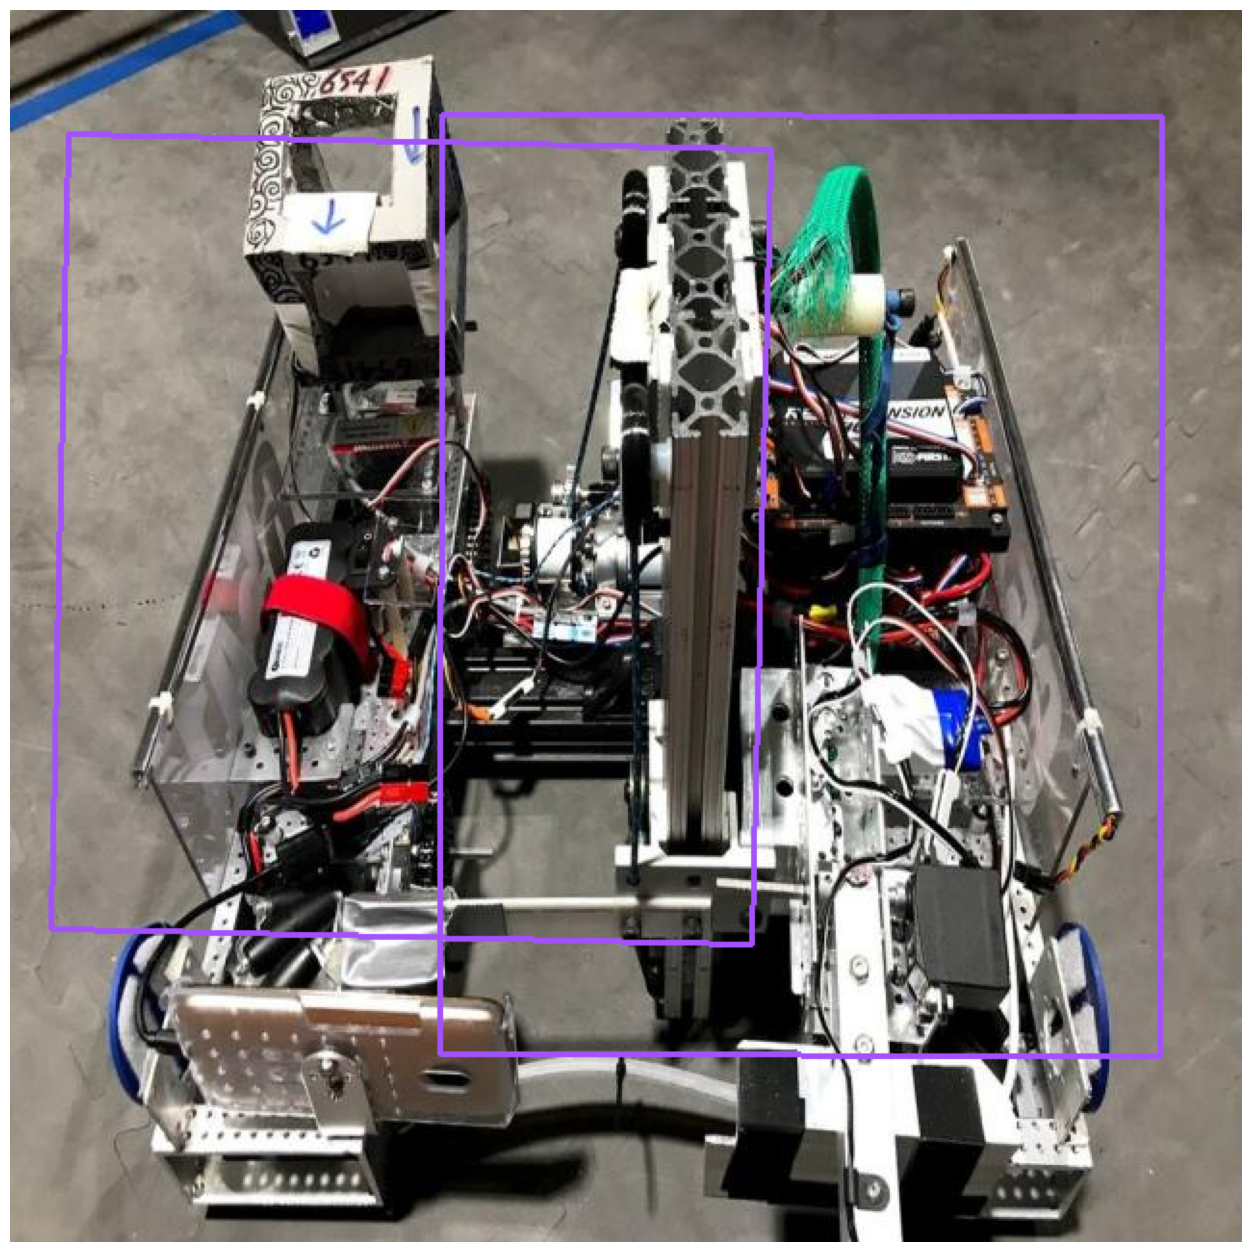

In [10]:
 !pip install supervision -q

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

Our model successfully identified the location of robots in the image. All robots have an oriented bounding box that fit the panel closely.

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.